In [1]:
import matplotlib.pyplot as plt
import numpy as np

import core
import data

batch_data = data.read_batch_data()

In [2]:
def cross_validation(alfa, batch_data, errors_cost = [1, 1]):
    contingency_matrix = [[0] * 2 for _ in range(2)]

    for test_idx in range(len(batch_data)):
        train_data = data.concate_except_idx(batch_data, test_idx)
        preparetion = core.train(train_data, errors_cost)

        for test_mail in batch_data[test_idx]:
            is_spam = core.classifier(preparetion, alfa, test_mail)
            contingency_matrix[is_spam][test_mail.is_spam] += 1

    f, _ = core.eval_f(contingency_matrix)
    return f

In [3]:
winner_f = -1
for alfa in np.arange(0.0, 1.0, 0.01):
    if str(alfa * 10).endswith('0'):
        print("eval for alfa " + str(alfa))
    f = cross_validation(alfa, batch_data)
    if winner_f < f:
        winner_f = f
        winner_alfa = alfa

print("Winner alfa " + str(alfa) + " with cross validation result " + str(winner_f))

eval for alfa 0.0
eval for alfa 0.1
eval for alfa 0.2
eval for alfa 0.3
eval for alfa 0.4
eval for alfa 0.5
eval for alfa 0.6
eval for alfa 0.8
eval for alfa 0.9
Winner alfa 0.99 with cross validation result 0.9790560358924203


In [4]:
def test(batch_data, alfa, lambda_spam, lambda_legit):
    for test_idx in range(len(batch_data)):
        train_data = data.concate_except_idx(batch_data, test_idx)
        preparetion = core.train(train_data, [lambda_legit, lambda_spam])

        for test_mail in batch_data[test_idx]:
            is_spam = core.classifier(preparetion, alfa, test_mail)
            if is_spam == 1 and test_mail.is_spam == 0:
                return False
    return True

In [5]:
alfa = 0.99
found = False
step = 100000
limit = 10 ** 90

lambda_spam = 1
iter = 0
while lambda_spam < limit and not found:
    lambda_legit = lambda_spam
    while lambda_legit < limit:
        iter += 1
        if test(batch_data, alfa, lambda_spam, lambda_legit):
            print("No mistakes at lambda spam '" + str(lambda_spam) + "' and legit '" + str(lambda_legit) + "'")
            found = True
            break
        if iter % 100 == 0:
            print("Iter number " + str(iter))

        lambda_legit *= step
    lambda_spam *= step

No mistakes at lambda spam '1' and legit '10000000000000000000000000000000000000000000000000000000'


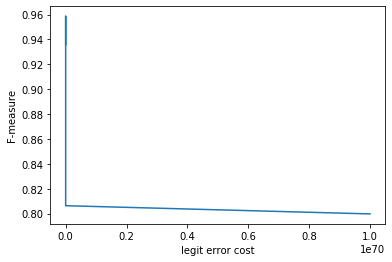

In [6]:
alfa = 0.99
step = 100000

lambda_step = 1
lambda_legit = 1

f = []
l = []
while lambda_legit <= 10 ** 70:
    f.append(cross_validation(alfa, batch_data, [lambda_legit, lambda_step]))
    l.append(lambda_legit)
    lambda_legit *= step

plt.plot(l, f)
plt.ylabel('F-measure')
plt.xlabel('legit error cost')
plt.show()